In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Blurring

### a) Average Blur

Text(0.5, 1.0, 'Average Blur 25 x 25 filter')

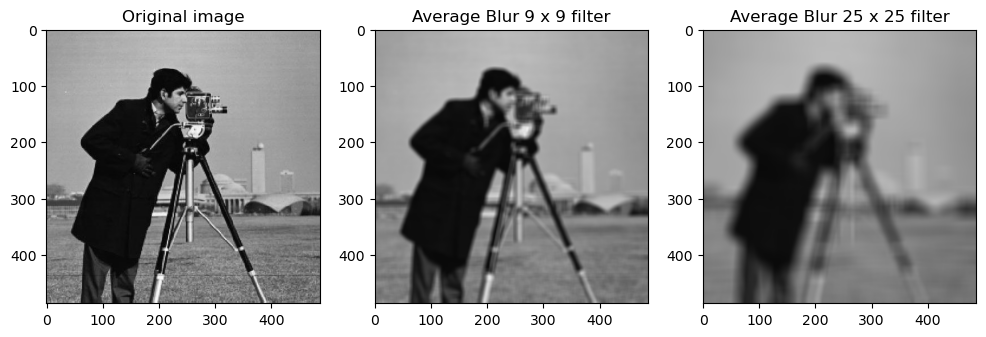

In [57]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(1, 3, 2)
avg_blur9 = cv2.blur(img, (9, 9))
plt.imshow(avg_blur9)
plt.title('Average Blur 9 x 9 filter')

plt.subplot(1, 3, 3)
avg_blur25 = cv2.blur(img, (25, 25))
plt.imshow(avg_blur25)
plt.title('Average Blur 25 x 25 filter')

### b) Gaussian Blur

Text(0.5, 1.0, 'Gaussian Blur 25 x 25 filter')

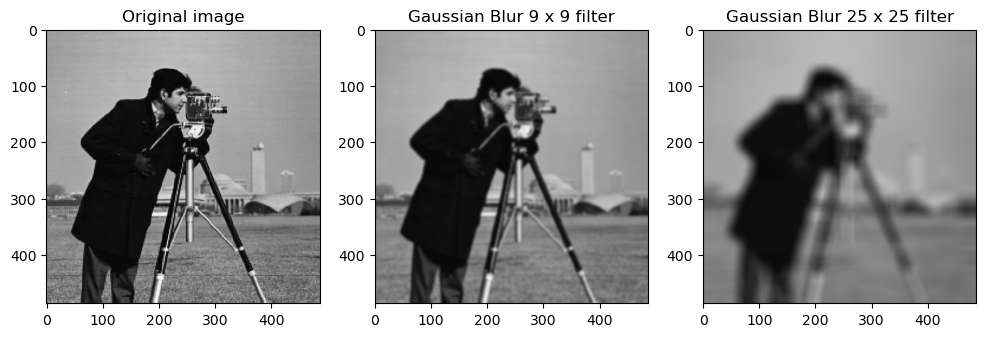

In [58]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(1, 3, 2)
gau_blur9 = cv2.GaussianBlur(img, (9, 9), sigmaX = 2, sigmaY = 2)
plt.imshow(gau_blur9)
plt.title('Gaussian Blur 9 x 9 filter')

plt.subplot(1, 3, 3)
gau_blur25 = cv2.GaussianBlur(img, (25, 25), sigmaX = 15, sigmaY = 15)
plt.imshow(gau_blur25)
plt.title('Gaussian Blur 25 x 25 filter')

### c) Median Blur

Text(0.5, 1.0, 'Median Blur 15 x 15 filter')

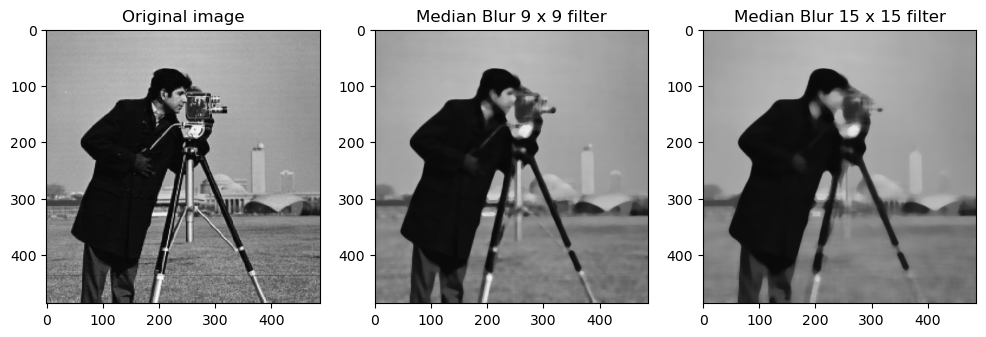

In [59]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(1, 3, 2)
med_blur9 = cv2.medianBlur(img, 9)
plt.imshow(med_blur9)
plt.title('Median Blur 9 x 9 filter')

plt.subplot(1, 3, 3)
med_blur15 = cv2.medianBlur(img, 15)
plt.imshow(med_blur15)
plt.title('Median Blur 15 x 15 filter')

### d) Resizing

Text(0.5, 1.0, 'Gaussian blurred image resized')

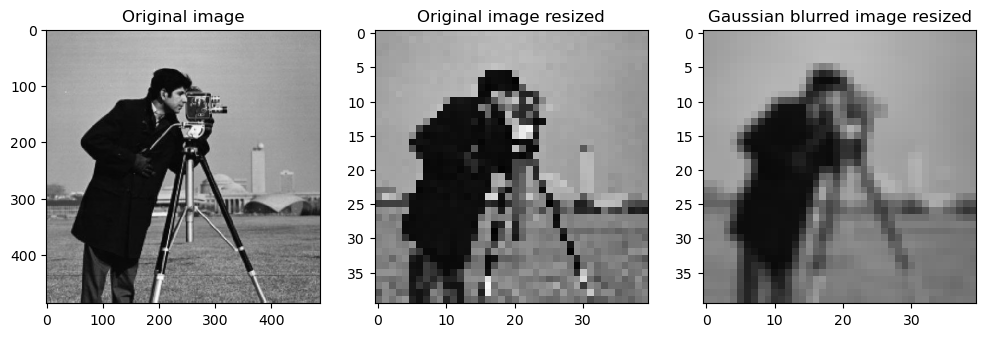

In [60]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(1, 3, 2)
resized_originial = cv2.resize(img, (40, 40), interpolation= cv2.INTER_LINEAR)
plt.imshow(resized_originial)
plt.title('Original image resized')

plt.subplot(1, 3, 3)
resized_gau25 = cv2.resize(gau_blur25, (40, 40), interpolation= cv2.INTER_LINEAR)
plt.imshow(resized_gau25)
plt.title('Gaussian blurred image resized')

## Edge Detection

### a) Sobel Edge Detection

Text(0.5, 1.0, 'Sobel Edge Detection')

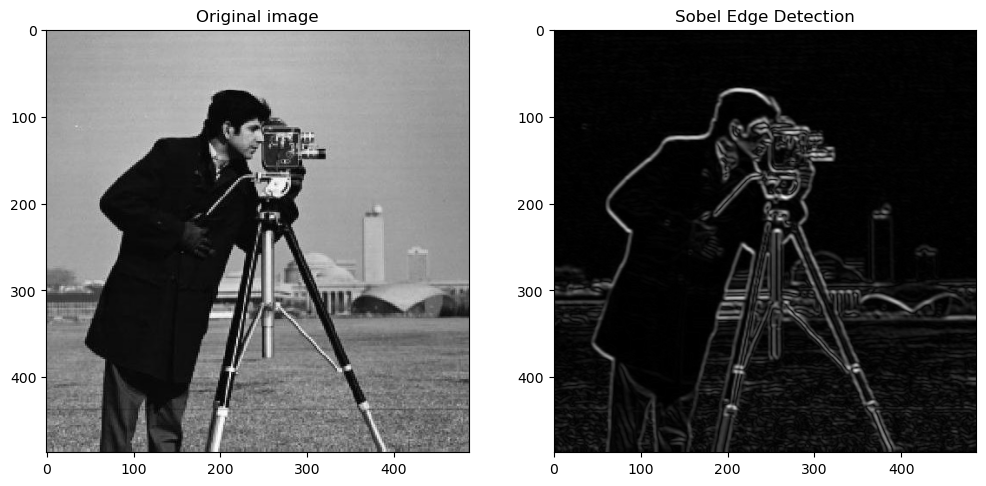

In [61]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

# apply filtering
ddepth = cv2.CV_32F
filt_img = cv2.GaussianBlur(img, (5, 5), sigmaX = 2, sigmaY = 2)
gray = cv2.cvtColor(filt_img, cv2.COLOR_RGB2GRAY)

# define kernels
k_x = np.array([[1,0,1],[-2,0,2],[-1,0,-1]])
k_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

sobel_x = cv2.filter2D(gray, ddepth, k_x)
sobel_y = cv2.filter2D(gray, ddepth, k_y)

# get magnitude
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap = 'gray')
plt.title('Sobel Edge Detection')

### b) Prewitt Edge Detection

Text(0.5, 1.0, 'Prewitt Edge Detection')

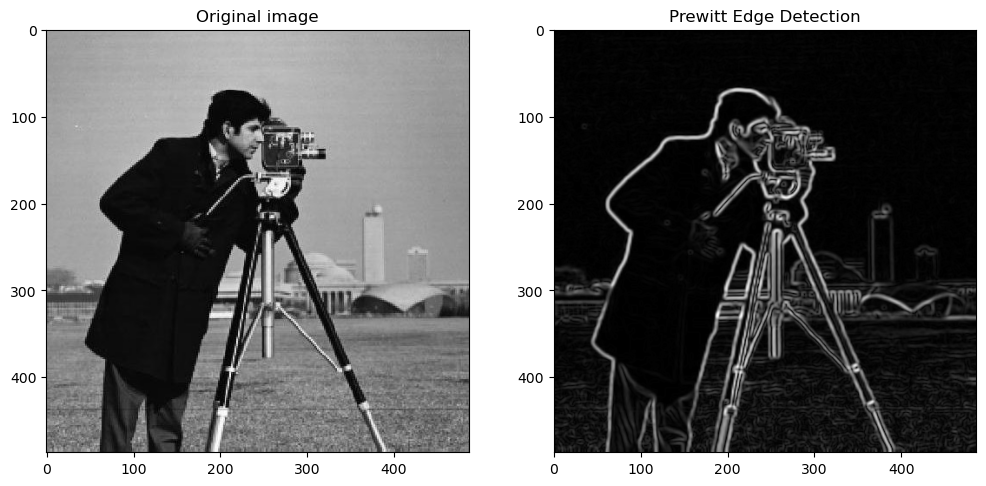

In [62]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

# define kernels
k_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
k_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

# perform manual filtering
prewitt_x = cv2.filter2D(gray, ddepth, k_x)
prewitt_y = cv2.filter2D(gray, ddepth, k_y)

# get magnitude
prewitt_magnitude = cv2.magnitude(prewitt_x, prewitt_y)
plt.subplot(1, 2, 2)
plt.imshow(prewitt_magnitude, cmap = 'gray')
plt.title('Prewitt Edge Detection')

### c) Laplacian Edge Detection

Text(0.5, 1.0, 'Laplacian Edge Detection')

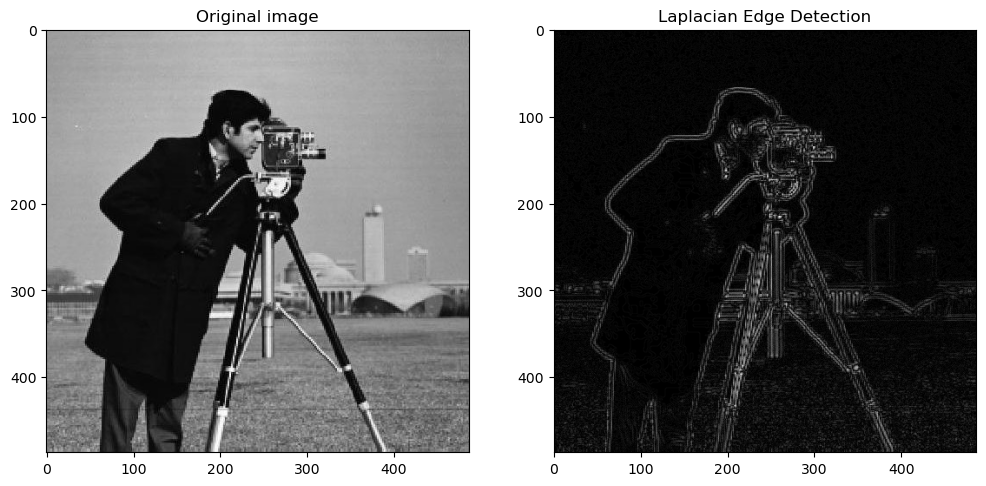

In [63]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

# define kernel
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

# perform manual filtering
laplacian_x = cv2.filter2D(gray, ddepth, kernel)
laplacian_y = cv2.filter2D(gray, ddepth, kernel)

magnitude_img = cv2.magnitude(laplacian_x, laplacian_y)

plt.subplot(1, 2, 2)
plt.imshow(magnitude_img, cmap = 'gray')
plt.title('Laplacian Edge Detection')

### d) DoG Edge Detection

Text(0.5, 1.0, 'DoG Edge Detection')

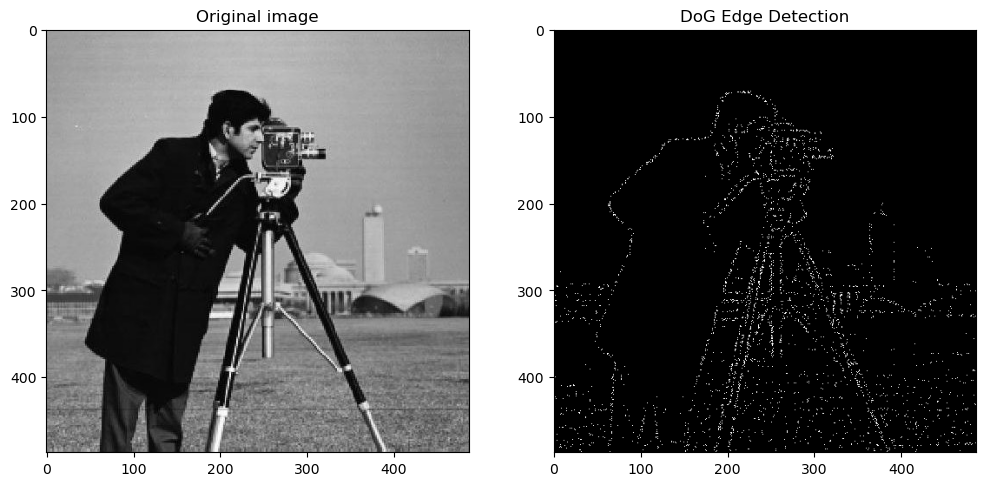

In [64]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

# low sigma gaussian filter
low_sig = cv2.GaussianBlur(gray, (3, 3), sigmaX = 2, sigmaY = 2)
high_sig = cv2.GaussianBlur(gray, (3, 3), sigmaX = 6, sigmaY = 6)

# get difference image
diff_image = low_sig - high_sig

plt.subplot(1, 2, 2)
plt.imshow(diff_image, cmap = 'gray')
plt.title('DoG Edge Detection')

## Task 5: Canny Edge Detector

In [101]:
'''
img = original image
sigma = sigma value for gausiaan blurr
k_size = kernel size for gaussian blue
thresh1 = lower threshold
thresh2 = upper threshold
'''
def getCannyEdges(img, sigma, k_size, thresh1, thresh2=255):
    
    # apply gaussian filter
    img_filtered = cv2.GaussianBlur(img, (k_size, k_size), sigma)
    
    # convery image to grayscale
    img_gray = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)
    
    # get image gradients
    g_x = cv2.Sobel(img_gray, ddepth = cv2.CV_32F, dx=1, dy=0, ksize = 3)
    g_y = cv2.Sobel(img_gray, ddepth = cv2.CV_32F, dx=0, dy=1, ksize = 3)
    
    # get magnitude 
    img_mag = np.abs(g_x) + np.abs(g_y)
    
    # get orientation
    img_ori = np.arctan2(g_y, g_x)
    
    # convert angles to degrees
    img_ori_deg = img_ori*180./np.pi
    img_ori_deg[img_ori_deg < 0] += 180  # flip negative values
    
    # apply non-max suppression
    supp_img = np.zeros_like(img_ori_deg, dtype = np.int32)
    r, c = img_ori_deg.shape
    
    for i in range(1, r-1):
        for j in range(1, c-1):
            try:
                val_a = 255
                val_b = 255
                
                # 0 degrees
                if (0 <= img_ori_deg[i,j] < 23) or (158 <= img_ori_deg[i,j] <= 180):
                    
                    # corresponding pixels in front and back of orientation
                    val_a = img_mag[i,j+1]
                    val_b = img_mag[i,j-1]
                    
                # 45 degrees    
                elif (23 <= img_ori_deg[i,j] < 68):
                    
                    # corresponding pixels in front and back of orientation
                    val_a = img_mag[i+1,j-1]
                    val_b = img_mag[i-1,j+1]
                
                # 90 degrees
                elif (68 <= img_ori_deg[i,j] < 113):
                    
                    # corresponding pixels in front and back of orientation
                    val_a = img_mag[i+1,j]
                    val_b = img_mag[i-1,j]
                
                # 135 degrees
                elif (113 <= img_ori_deg[i,j] < 158):
                    
                    # corresponding pixels in front and back of orientation
                    val_a = img_mag[i-1,j+1]
                    val_b = img_mag[i+1,j-1]
                
                # if current edge value has the maximum value, keep it
                if (img_mag[i,j] >= val_a) and (img_mag[i,j] >= val_b):
                    supp_img[i,j] = img_mag[i,j]
                    
            except IndexError as e:
                pass
    
    canny_edges = np.zeros_like(supp_img, dtype = np.int32)
    # edge joining
    for i in range(1, r-1):
        for j in range (1, c-1):
            
            # if current edge pixel is a strong edge, keep it
            if supp_img[i, j] >= thresh2:
                canny_edges[i, j] = thresh2
            
            # if current edge pixel is a weak edge, check for surrounding 8 values
            elif (thresh1 <= supp_img[i, j] < thresh2):
                val_a = supp_img[i, j+1]
                val_b = supp_img[i+1, j+1]
                val_c = supp_img[i+1, j]
                val_d = supp_img[i-1, j-1]
                val_e = supp_img[i, j-1]
                val_f = supp_img[i-1, j-1]
                val_g = supp_img[i-1, j]
                val_h = supp_img[i-1, j+1]
                
                # if any of the surrounding pixels is a strong edge, keep the current edge
                if max([val_a, val_b, val_c, val_d, val_e, val_f, val_g, val_h]) >= thresh2:
                    canny_edges[i, j] = thresh2
            
            # else, remove edge pixel
            else:
                canny_edges[i, j] = 0
                
    # plotting
    plt.figure(figsize = (12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(img)
    plt.title('Original_image')
    
    plt.subplot(2, 3, 2)
    plt.imshow(g_x, cmap = 'gray')
    plt.title('g_x')
    
    plt.subplot(2, 3, 3)
    plt.imshow(g_x, cmap = 'gray')
    plt.title('g_y')
    
    plt.subplot(2, 3, 4)
    plt.imshow(img_mag, cmap = 'gray')
    plt.title('magnitude')
    
    plt.subplot(2, 3, 5)
    plt.imshow(supp_img, cmap = 'gray')
    plt.title('non-max suppressed')
    
    plt.subplot(2, 3, 6)
    plt.imshow(canny_edges, cmap = 'gray')
    plt.title('Canny edge detection')
    
    return canny_edges

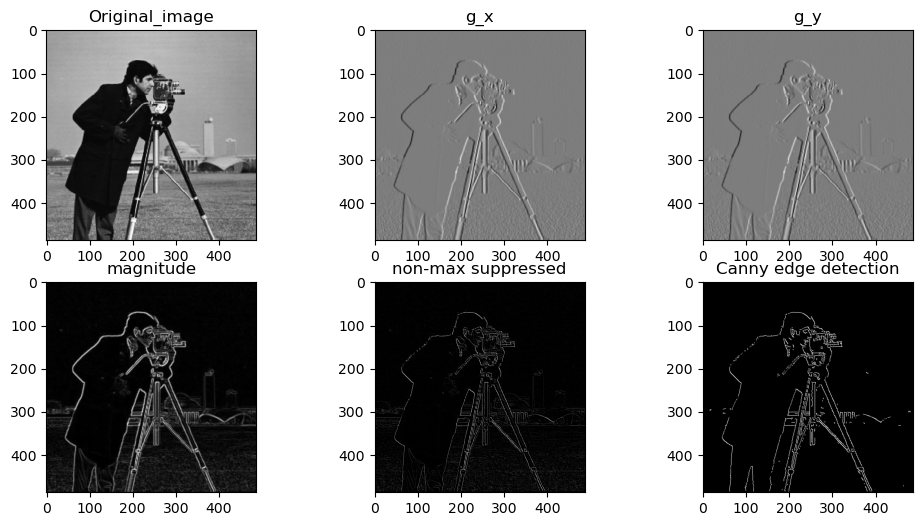

In [102]:
canny_edges = getCannyEdges(img, sigma = 1, k_size = 3, thresh1 = 180, thresh2 = 255)

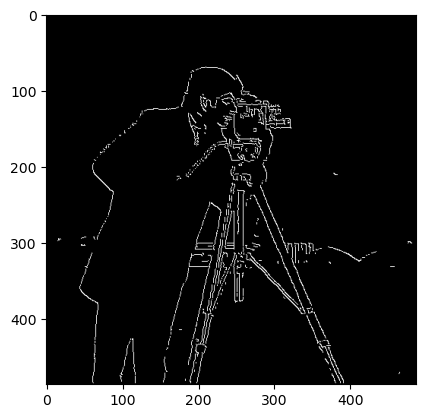

In [103]:
plt.imshow(canny_edges, cmap = 'gray')